# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
#neko.txt.mecabの作成
import MeCab
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

neko_file = '/users/seiji/言語処理100本ノック/第4章: 形態素解析/neko.txt'
mecab_file1 = '/users/seiji/言語処理100本ノック/第4章: 形態素解析/neko.txt.mecab'

with open(neko_file, mode="r") as data_file, \
        open(mecab_file1, mode="w") as mecabFile:
    text = data_file.read()
    morphome_text = mecab.parse(text)
    mecabFile.write(morphome_text)
    

# 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
def mapping_morphome(mecab_file):

    with open(mecab_file, mode="r", encoding='utf-8') as me_file:
        sentence = []
        sentences = []
        
        for morphome in me_file.read().split('\n'):
             # MeCabの形態素解析結果
            # 　→　表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

            # 解析結果をタブで区切る
            surface = morphome.split('\t')
            
            #タブがある行のみを処理
            if len(surface) >= 2:
                
                #残りをカンマで区切る
                result = surface[1].split(',')
                
                #マッピング型で格納
                word = {
                    'surface': surface[0],
                    'base': result[6],
                    'pos': result[0],
                    'pos1': result[1]
                }
                
                #1文単位のリストに追加
                sentence.append(word)
                
                #句点の場合、終了
                if word['pos1'] == '句点':
                    sentences.append(sentence)
                    #`sentence`を空に
                    sentence = []
                    
    return sentences

In [3]:
morphomes = mapping_morphome(mecab_file1)
print(morphomes[0])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩は猫である', 'base': '吾輩は猫である', 'pos': '名詞', 'pos1': '固有名詞'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


# 31. 動詞

動詞の表層形をすべて抽出せよ．

In [4]:
verbs_surface = []

for sentence in morphomes:
    for word in sentence:
        if word['pos'] == '動詞':
            verbs_surface.append(word['surface'])

In [5]:
print(verbs_surface)

['生れ', 'つか', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', 'ある', 'ある', 'し', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ', 'し', 'いい', '来', 'ぶら下げ', '向け', 

# 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [6]:
verbs_base = []

for sentence in morphomes:
    for word in sentence:
        if word['pos'] == '動詞':
            verbs_base.append(word['base'])

In [7]:
print(verbs_base)

['生れる', 'つく', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', 'ある', 'ある', 'する', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '繰り返す', 'する', 'いる', '云う', 'なる', 'する',

# 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
noun_phrases = []

for sentence in morphomes:
    for i in range(0, len(sentence)):
        if sentence[i]['pos'] == '名詞' and sentence[i+1]['surface'] == "の" \
                and sentence[i+2]['pos'] == '名詞':
            noun_phrase = sentence[i]['surface'] + "の" + sentence[i+2]['surface']
            
            noun_phrases.append(noun_phrase)

In [9]:
print(noun_phrases)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', 'ようやくの思い', '池の前', 'ようやくの事', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住家', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', 'うちの小供', '小供の寝床', '彼等の中間', '小供の一人', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '目刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', 'うちの小供', '小春の穏', '日の二時', '茶の木の根', '西側の杉垣', '杉垣のそば

# 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [10]:
longest_consecutive_nouns = []

for sentence in morphomes:
    for i in range(0, len(sentence)):
        if sentence[i]['pos'] == '名詞':
            consecutive_nouns = []
            while sentence[i]['pos'] == '名詞':
                consecutive_nouns.append(sentence[i]['surface'])
                i += 1
        
        if len(consecutive_nouns) > len(longest_consecutive_nouns):
            longest_consecutive_nouns = consecutive_nouns
                

In [11]:
print(longest_consecutive_nouns)

['八万', '八', '千', '八', '百', '八', '十', '本']


# 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [12]:
words_freq = {}

for sentence in morphomes:
    for word in sentence:
        base_word = word['base']
        if base_word not in words_freq:
            words_freq[base_word] = 1
        else:
            words_freq[base_word] += 1

In [13]:
sorted_words = sorted(words_freq.items(), key=lambda x:x[1], reverse=True)
print(sorted_words)

[('の', 9101), ('。', 7484), ('、', 6772), ('て', 6682), ('は', 6385), ('に', 6173), ('を', 6068), ('だ', 5835), ('と', 5481), ('が', 5260), ('た', 4196), ('する', 3555), ('「', 3231), ('」', 3225), ('ない', 2903), ('も', 2435), ('ある', 2256), ('で', 2094), ('から', 2011), ('いる', 1735), ('か', 1433), ('ん', 1415), ('云う', 1407), ('*', 1222), ('事', 1175), ('です', 1144), ('なる', 1114), ('ます', 1084), ('へ', 1033), ('もの', 972), ('君', 952), ('主人', 928), ('う', 918), ('ぬ', 703), ('よう', 689), ('見る', 672), ('ね', 647), ('この', 635), ('ば', 612), ('御', 595), ('その', 560), ('何', 518), ('よ', 501), ('思う', 498), ('吾輩', 477), ('来る', 457), ('そう', 456), ('れる', 447), ('…', 433), ('じゃ', 429), ('人', 424), ('\u3000', 411), ('これ', 397), ('それ', 385), ('さ', 383), ('聞く', 347), ('迷亭', 343), ('でも', 341), ('行く', 336), ('出来る', 322), ('ところ', 311), ('まで', 304), ('時', 295), ('方', 294), ('な', 294), ('やる', 292), ('上', 285), ('寒月', 278), ('一', 277), ('先生', 274), ('いい', 270), ('くらい', 269), ('出る', 267), ('人間', 264), ('僕', 263), ('顔', 262), ('ごとし', 254),

# 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

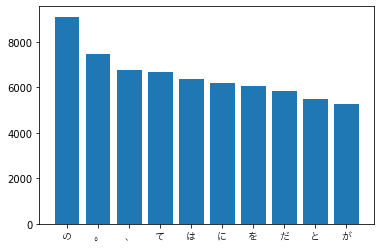

In [14]:
top_10 = sorted_words[:10]

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc')
dataset = list(zip(*top_10)) #zip(*)で元のイテラブルに分解
plt.xticks(range(len(dataset[0])), dataset[0], fontproperties=fp)
plt.bar(range(len(dataset[0])), dataset[1], align='center')

# 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [15]:
from collections import Counter

co_occurred = []

for sentence in morphomes:
    if any(word['base'] == '猫' for word in sentence):
        words = [word['base'] for word in sentence if word['base'] != '猫']
        co_occurred.extend(words)
        
cnt = Counter(co_occurred).most_common(10)

In [16]:
print(cnt)

[('の', 366), ('は', 269), ('、', 247), ('に', 229), ('を', 226), ('だ', 222), ('て', 214), ('。', 205), ('と', 195), ('が', 171)]


In [17]:
#品詞を限定する

from collections import Counter

co_occurred_limited = []

for sentence in morphomes:
    if any(word['base'] == '猫' for word in sentence):
        
        words = [
            word['base'] 
            for word in sentence 
            if word['base'] != '猫'
            and word['pos'] in ['名詞','動詞','形容詞','副詞']
        ]
        co_occurred_limited.extend(words)
        
cnt_limited = Counter(co_occurred_limited).most_common(10)

In [18]:
print(cnt_limited)

[('する', 138), ('事', 55), ('吾輩', 54), ('いる', 53), ('ある', 50), ('の', 50), ('人間', 36), ('ない', 35), ('云う', 35), ('もの', 34)]


Text(0, 0.5, '共起頻度')

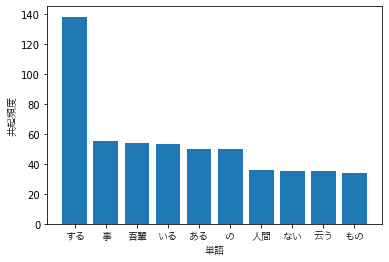

In [19]:
cat_data = list(zip(*cnt_limited))
plt.xticks(range(len(cat_data[0])), cat_data[0], fontproperties=fp)
plt.bar(range(len(cat_data[0])), cat_data[1])
plt.xlabel('単語', fontproperties=fp)
plt.ylabel('共起頻度', fontproperties=fp)

# 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(array([1.2503e+04, 1.4000e+01, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.000e+00, 9.110e+02, 1.821e+03, 2.731e+03, 3.641e+03, 4.551e+03,
        5.461e+03, 6.371e+03, 7.281e+03, 8.191e+03, 9.101e+03]),
 <a list of 10 Patch objects>)

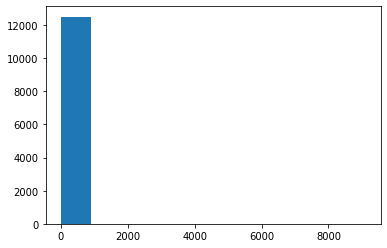

In [20]:
words_data = list(zip(*words_freq.items()))

plt.hist(words_data[1])

(array([   0., 5628., 2118., 1025.,  650.,  489.,  318.,  265.,  202.,
         300.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

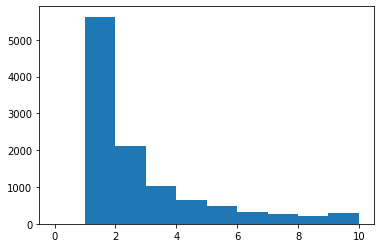

In [21]:
#レンジを絞ってヒストグラムを描く
plt.hist(words_data[1], range=(0, 10))

(array([798., 263., 156., 102.,  50.,  34.,  33.,  22.,  24.,  19.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

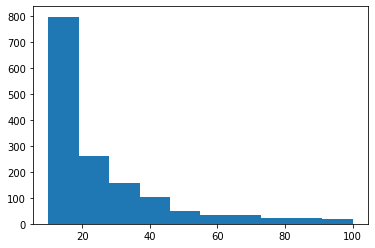

In [22]:
plt.hist(words_data[1], range=(10, 100))

(array([75., 30., 12., 10.,  4.,  4.,  4.,  0.,  0.,  4.]),
 array([ 100.,  190.,  280.,  370.,  460.,  550.,  640.,  730.,  820.,
         910., 1000.]),
 <a list of 10 Patch objects>)

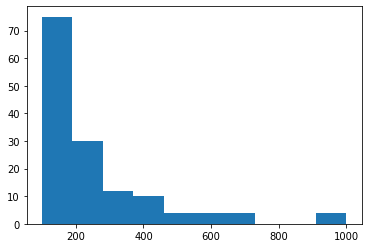

In [23]:
plt.hist(words_data[1], range=(100, 1000))

(array([10.,  4.,  3.,  2.,  0.,  2.,  4.,  2.,  1.,  0.]),
 array([1000., 1800., 2600., 3400., 4200., 5000., 5800., 6600., 7400.,
        8200., 9000.]),
 <a list of 10 Patch objects>)

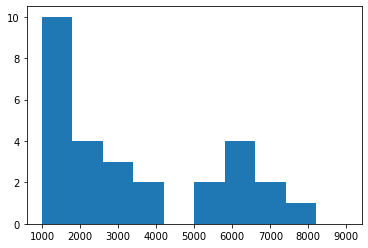

In [24]:
plt.hist(words_data[1], range=(1000, 9000))

# 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

Text(0.5, 1.0, 'Zipfの法則')

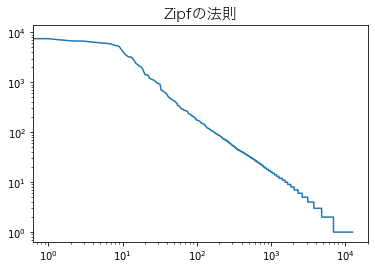

In [27]:
sorted_words_freq = list(zip(*sorted_words))

plt.plot(range(len(sorted_words_freq[1])), sorted_words_freq[1])

ax = plt.gca()

ax.set_yscale('log') 
ax.set_xscale('log')

plt.title('Zipfの法則', fontproperties=fp, fontsize=15)